<a href="https://colab.research.google.com/github/Abhishek4848/Amazon-product-listing-Analysis/blob/master/AmazonDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

## Importing Dataset


In [2]:
url = 'https://raw.githubusercontent.com/Abhishek4848/Amazon-product-listing-Analysis/master/AmazonData.csv'
amzn = pd.read_csv(url, error_bad_lines=False)

In [3]:
amzn.head()

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Offers,Combo Offers,Stock Availibility
0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11 +0000,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000,799,60.05%,NaN,YES
1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54 +0000,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040,2040,0%,NaN,YES
2,41654633cce38c8650690f6dbac01fd3,2019-10-30 09:53:23 +0000,Skin Care,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",Generic,NaN,1824,1042,42.87%,NaN,YES
3,08b1bd85c3efc2d7aa556fd79b073382,2019-10-29 16:16:52 +0000,Skin Care,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,Generic,NaN,2185,1399,35.97%,NaN,YES
4,3ac3f213732512d1d11bb73ab3b1900f,2019-10-31 09:32:06 +0000,Grocery & Gourmet Foods,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in India,Harveys,NaN,594,570,4.04%,NaN,YES


###Rows,Columns

In [4]:
amzn.shape

(30000, 12)

In [5]:
amzn['Brand'].value_counts()

CHOCOCRAFT      1465
Generic         1284
Chocholik        698
World Beauty     527
BOGATCHI         420
                ... 
Gloviva            1
Certain            1
Yves               1
DALUCI             1
WAGA               1
Name: Brand, Length: 8454, dtype: int64

In [6]:
amzn.nunique()

Uniq Id                  30000
Crawl Timestamp          27870
Category                     6
Product Title            29630
Product Description      22576
Brand                     8454
Pack Size Or Quantity      453
Mrp                       6371
Price                     6296
Offers                    4338
Combo Offers                36
Stock Availibility           2
dtype: int64

###No. of NULL/Na values in each field

In [7]:
amzn.isna().sum()

Uniq Id                      0
Crawl Timestamp              0
Category                     0
Product Title                0
Product Description       1990
Brand                       87
Pack Size Or Quantity    19776
Mrp                        699
Price                      600
Offers                     466
Combo Offers             29963
Stock Availibility           0
dtype: int64

  #### HEATMAP FOR NULL VALUES

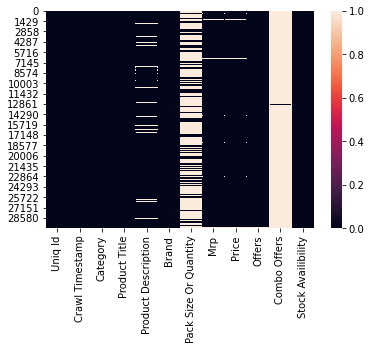

In [8]:
sns.heatmap(amzn.isna())

In [9]:
amzn.describe()

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Offers,Combo Offers,Stock Availibility
count,30000,30000,30000,30000,28010,29913,10224,29301,29400,29534,37,30000
unique,30000,27870,6,29630,22576,8454,453,6371,6296,4338,36,2
top,7463ed94756e4896f65a06f48aedf26f,2019-10-28 22:24:30 +0000,Skin Care,Xplus Bath Loofah(Pack of 3),This Chocolate Gift Box contains delectable as...,CHOCOCRAFT,327 Grams,999,695,0%,RTF Special offer Aloe vera Magnetic cool eye...,YES
freq,1,4,15033,39,276,1465,437,808,389,12300,2,29523


## DATA CLEANING



### Brand column fix

In [10]:
#there are empty spaces in brand column which is as good as NaN value
amzn['Brand'].replace(' ',np.NaN,inplace=True)
print("EMPTY VALUES IN BRAND COLUMN: ",amzn['Brand'].isna().sum())

EMPTY VALUES IN BRAND COLUMN:  184


Since there is only 184 empty  in the brand column , we can impute these values instead of removing it.

In [11]:
amzn['Brand'].replace(np.NaN,-1,inplace=True)
for i in range(len(amzn['Uniq Id'])):
    if(amzn['Brand'][i] == -1):
        brand = amzn['Product Title'][i].strip().split(' ')
        amzn['Brand'][i] = " ".join(brand[0:2])
        #print(brand[0:2])

In [12]:
amzn.isna().sum()

Uniq Id                      0
Crawl Timestamp              0
Category                     0
Product Title                0
Product Description       1990
Brand                        0
Pack Size Or Quantity    19776
Mrp                        699
Price                      600
Offers                     466
Combo Offers             29963
Stock Availibility           0
dtype: int64

### Price and Mrp Coulumn Fix

In [13]:
amzn['Price'].replace('NAN',np.NaN,inplace=True)
print("EMPTY VALUES IN PRICE COLUMN: ",amzn['Price'].isna().sum())

EMPTY VALUES IN PRICE COLUMN:  600


In [14]:
for i in range(len(amzn['Uniq Id'])):
  try:
    amzn['Price'][i] == float(amzn['Price'][i])
    amzn['Mrp'][i] == float(amzn['Mrp'][i])
  except:
    price = float(amzn['Price'][i][1:])
    mrp = float(amzn['Mrp'][i][1:])
    amzn['Price'][i] = price
    amzn['Mrp'][i] = mrp


In [15]:
for i in range(len(amzn['Uniq Id'])):
  try:
    amzn['Mrp'][i] == float(amzn['Mrp'][i])
  except:
    mrp = float(amzn['Mrp'][i][1:])
    amzn['Mrp'][i] = mrp

In [16]:
amzn['Category'].value_counts()

Skin Care                  15033
Grocery & Gourmet Foods     8064
Hair Care                   2459
Bath & Shower               2140
Fragrance                   2107
Detergents & Dishwash        197
Name: Category, dtype: int64

In [17]:
amzn['Price'] = amzn['Price'].astype('float')
amzn['Mrp'] = amzn['Mrp'].astype('float')

skin_care = amzn[amzn['Category'] == 'Skin Care']
grocery =  amzn[amzn['Category'] == 'Grocery & Gourmet Foods']
bath = amzn[amzn['Category'] == 'Bath & Shower']
fragrance = amzn[amzn['Category'] == 'Fragrance']
Hair = amzn[amzn['Category'] == 'Hair Care']
Dish =amzn[amzn['Category'] == 'Detergents & Dishwash']
#np.mean([amzn['Price'][i]=='Hair Care' for i in range(len(amzn['Uniq Id']))])

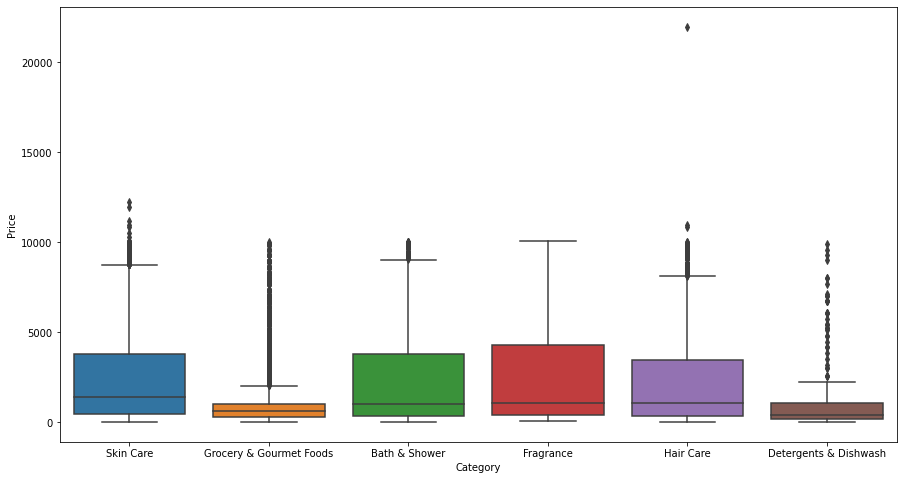

In [18]:
plt.figure(figsize = (15,8))
sns.boxplot(y = amzn['Price'],  x = amzn['Category'])

In [19]:
print("THE MEDIAN PRICE FOR THE CATEGORY SKIN CARE IS : ",np.nanmedian(skin_care['Price']))
skin_care['Price'].fillna(np.nanmedian(skin_care['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY GROCERY IS : ",np.nanmedian(grocery['Price']))
grocery['Price'].fillna(np.nanmedian(grocery['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY BATH & SHOWER IS : ",np.nanmedian(bath['Price']))
bath['Price'].fillna(np.nanmedian(bath['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY FRAGRANCE IS : ",np.nanmedian(fragrance['Price']))
fragrance['Price'].fillna(np.nanmedian(fragrance['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY HAIR CARE IS : ",np.nanmedian(Hair['Price']))
Hair['Price'].fillna(np.nanmedian(Hair['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY DETERGENTS & DISHWASH IS : ",np.nanmedian(Dish['Price']))
Dish['Price'].fillna(np.nanmedian(Dish['Price']),inplace=True)

THE MEDIAN PRICE FOR THE CATEGORY SKIN CARE IS :  1390.0
THE MEDIAN PRICE FOR THE CATEGORY GROCERY IS :  630.0
THE MEDIAN PRICE FOR THE CATEGORY BATH & SHOWER IS :  1029.0
THE MEDIAN PRICE FOR THE CATEGORY FRAGRANCE IS :  1056.5
THE MEDIAN PRICE FOR THE CATEGORY HAIR CARE IS :  1047.5
THE MEDIAN PRICE FOR THE CATEGORY DETERGENTS & DISHWASH IS :  399.0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
print("THE MEDIAN MRP FOR THE CATEGORY SKIN CARE IS : ",np.nanmedian(skin_care['Mrp']))
skin_care['Mrp'].fillna(np.nanmedian(skin_care['Mrp']),inplace=True)
print("THE MEDIAN MRP FOR THE CATEGORY GROCERY IS : ",np.nanmedian(grocery['Mrp']))
grocery['Mrp'].fillna(np.nanmedian(grocery['Mrp']),inplace=True)
print("THE MEDIAN MRP FOR THE CATEGORY BATH & SHOWER IS : ",np.nanmedian(bath['Mrp']))
bath['Mrp'].fillna(np.nanmedian(bath['Mrp']),inplace=True)
print("THE MEDIAN MRP FOR THE CATEGORY FRAGRANCE IS : ",np.nanmedian(fragrance['Mrp']))
fragrance['Mrp'].fillna(np.nanmedian(fragrance['Mrp']),inplace=True)
print("THE MEDIAN MRP FOR THE CATEGORY HAIR CARE IS : ",np.nanmedian(Hair['Mrp']))
Hair['Mrp'].fillna(np.nanmedian(Hair['Mrp']),inplace=True)
print("THE MEDIAN MRP FOR THE CATEGORY DETERGENTS & DISHWASH IS : ",np.nanmedian(Dish['Mrp']))
Dish['Mrp'].fillna(np.nanmedian(Dish['Mrp']),inplace=True)

THE MEDIAN MRP FOR THE CATEGORY SKIN CARE IS :  1843.0
THE MEDIAN MRP FOR THE CATEGORY GROCERY IS :  699.0
THE MEDIAN MRP FOR THE CATEGORY BATH & SHOWER IS :  1521.0
THE MEDIAN MRP FOR THE CATEGORY FRAGRANCE IS :  1499.0
THE MEDIAN MRP FOR THE CATEGORY HAIR CARE IS :  1339.0
THE MEDIAN MRP FOR THE CATEGORY DETERGENTS & DISHWASH IS :  425.0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
amzn = pd.concat([skin_care,grocery,bath,fragrance,Hair,Dish])
len(amzn)

30000

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



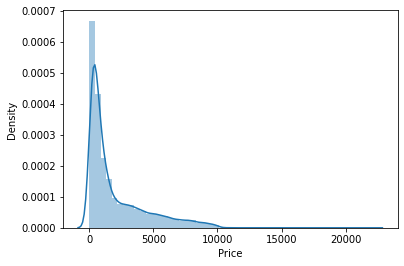

In [22]:
sns.distplot(amzn['Price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



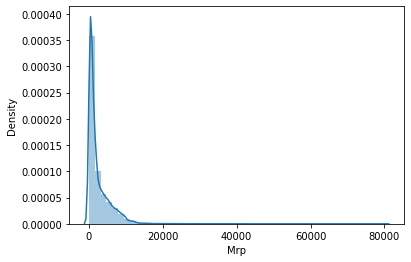

In [23]:
sns.distplot(amzn['Mrp'])

In [24]:
amzn.isna().sum()

Uniq Id                      0
Crawl Timestamp              0
Category                     0
Product Title                0
Product Description       1990
Brand                        0
Pack Size Or Quantity    19776
Mrp                          0
Price                        0
Offers                     466
Combo Offers             29963
Stock Availibility           0
dtype: int64

### OFFER column fix


In [25]:
l = list(amzn.index)
len(l)

30000

In [26]:
inval =[]
for i in l:
  try:
    discount = (1 - amzn['Price'][i]/amzn['Mrp'][i])*100
    if(discount < 0):
      print("MRP :",amzn['Mrp'][i])
      print("PRICE:",amzn['Price'][i])
      discount = 0
    amzn['Offers'][i] = discount
  except:
    inval.append(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MRP : 1843.0
PRICE: 3200.0
MRP : 1843.0
PRICE: 2378.0
MRP : 1843.0
PRICE: 7820.0
MRP : 1843.0
PRICE: 6625.0
MRP : 699.0
PRICE: 773.0
MRP : 1499.0
PRICE: 3829.0
MRP : 1339.0
PRICE: 3045.0
MRP : 425.0
PRICE: 455.68


In [27]:
amzn.head()

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Offers,Combo Offers,Stock Availibility
0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11 +0000,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000.0,799.0,60.05,NaN,YES
1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54 +0000,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040.0,2040.0,0,NaN,YES
2,41654633cce38c8650690f6dbac01fd3,2019-10-30 09:53:23 +0000,Skin Care,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",Generic,NaN,1824.0,1042.0,42.8728,NaN,YES
3,08b1bd85c3efc2d7aa556fd79b073382,2019-10-29 16:16:52 +0000,Skin Care,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,Generic,NaN,2185.0,1399.0,35.9725,NaN,YES
5,f89b246d4e27c11623dbc7742523f319,2019-10-30 19:14:20 +0000,Skin Care,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",ShiKai,354 g,5344.0,5344.0,0,NaN,YES


In [28]:
amzn['Offers'].dropna(axis = 0,inplace= True)

In [29]:
amzn['Combo Offers'].fillna(0,inplace = True)
amzn['Combo Offers'].replace(1,'YES',inplace=True)
amzn['Stock Availibility'].replace('YES',1,inplace=True)
amzn['Stock Availibility'].replace('NO',0,inplace=True)
amzn['Product Description'].fillna('-',inplace = True)
amzn['Pack Size Or Quantity'].fillna('-',inplace=True)

In [30]:
amzn.isna().sum()

Uniq Id                  0
Crawl Timestamp          0
Category                 0
Product Title            0
Product Description      0
Brand                    0
Pack Size Or Quantity    0
Mrp                      0
Price                    0
Offers                   0
Combo Offers             0
Stock Availibility       0
dtype: int64

### Date column fix

In [31]:
datetime_str = amzn['Crawl Timestamp'][0]
datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S %z')
print(type(datetime_object))
print(datetime_object)

<class 'datetime.datetime'>
2019-10-30 11:38:11+00:00


In [32]:
for i in l:
  datetime_str = amzn['Crawl Timestamp'][i]
  datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S %z')
  amzn['Crawl Timestamp'][i] = datetime_object

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Exploratory Data Analysis


#### Corelation matrix to get insights about the relationships between the variables of the dataset

In [33]:
corelation = amzn.corr()
corelation

,Mrp,Price,Stock Availibility
Mrp,1.000000,0.893004,0.032141
Price,0.893004,1.000000,0.038877
Stock Availibility,0.032141,0.038877,1.000000


#### Heatmap to visualise the Corelation

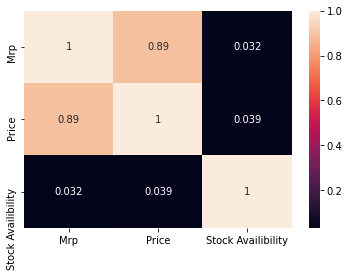

In [34]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

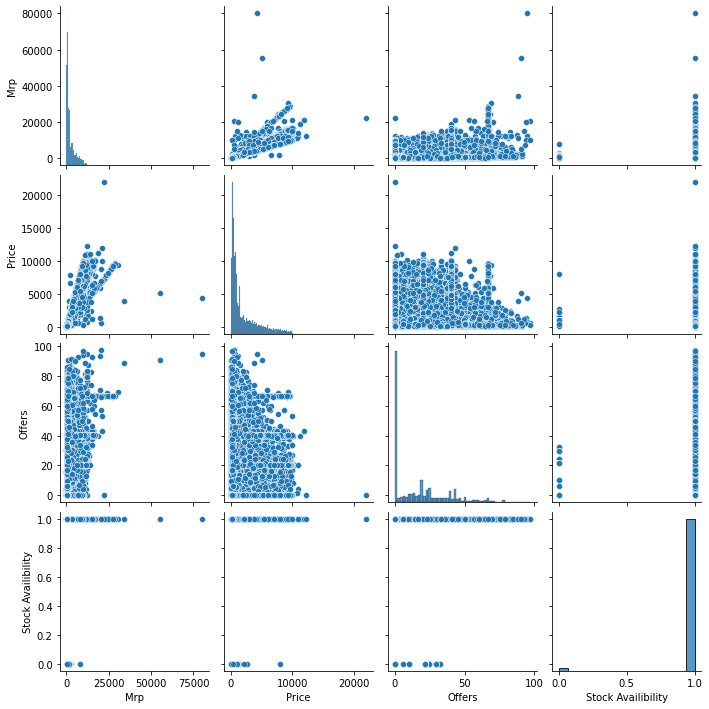

In [35]:
sns.pairplot(amzn)

In [36]:
#sns.relplot(x='Category', y=amzn['Brand'].value_counts(),data = amzn)

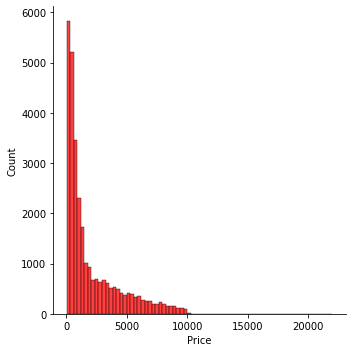

In [37]:
sns.displot(amzn['Price'], color="r", bins=75)

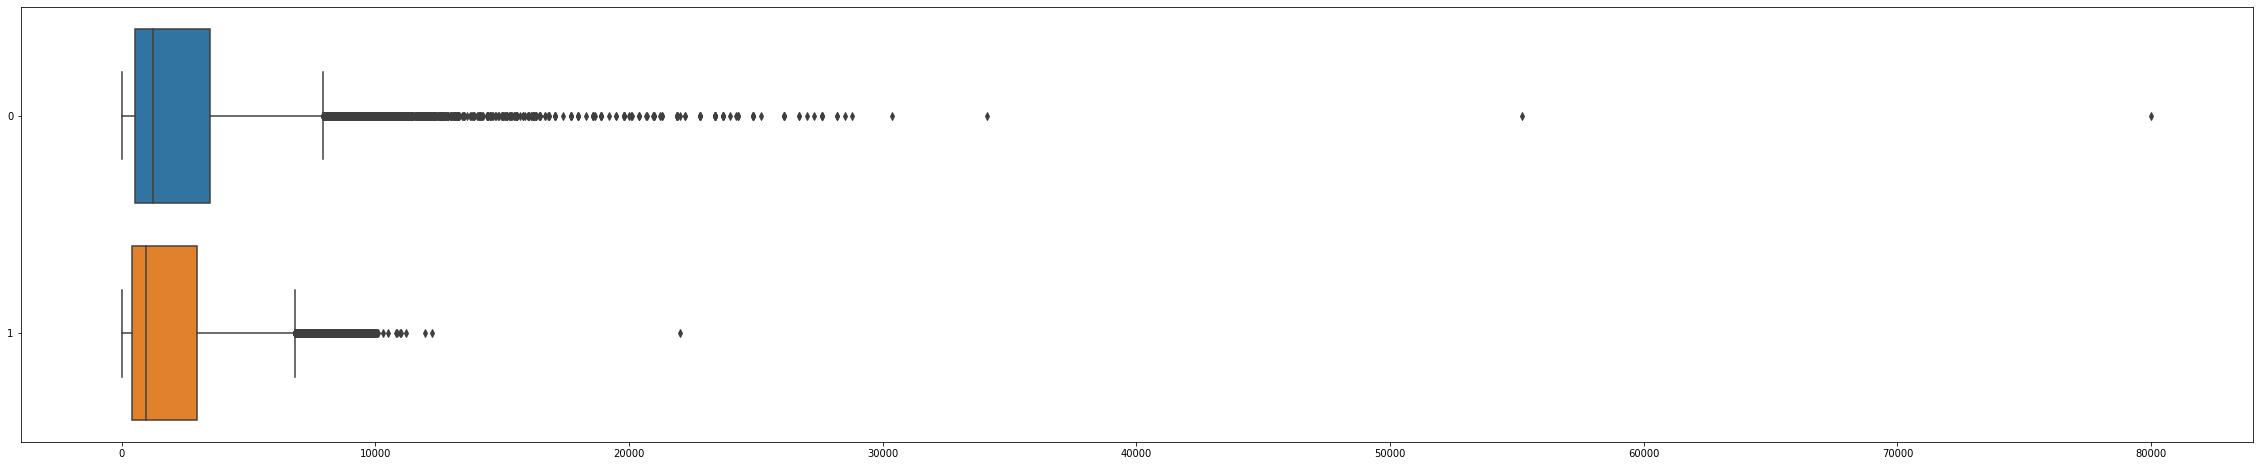

In [83]:
plt.figure(figsize = (40,8))
sns.boxplot(data = [amzn["Mrp"],amzn["Price"]],orient="h",)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



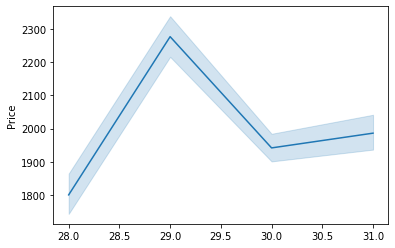

In [38]:
months = [amzn['Crawl Timestamp'][i].day for i in l]
sns.lineplot(months,amzn['Price'])

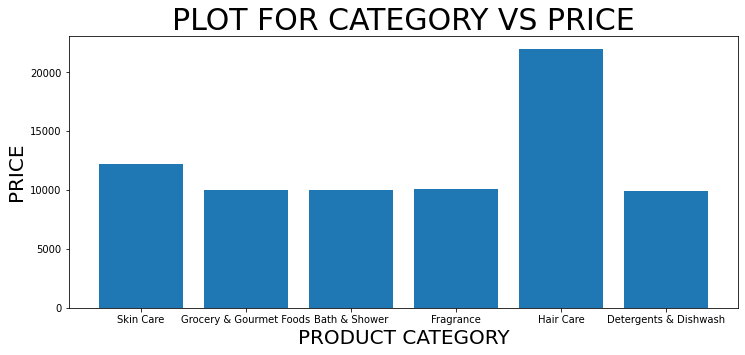

In [39]:
plt.figure(figsize = (12,5))
plt.title('PLOT FOR CATEGORY VS PRICE',fontsize=30)
plt.bar(amzn['Category'].tolist(),amzn['Price'].tolist())
plt.xlabel("PRODUCT CATEGORY",fontsize=20)
plt.ylabel("PRICE",fontsize=20)
plt.show()

In [59]:
fig = px.histogram(amzn, x="Category",title='Number of products sold in each category',labels={'Category':'Product Category'}, color_discrete_sequence=['green'] )
fig.show()
print("Skin Care products are the higest selling products in the month")

Skin Care products are the higest selling products in the month


In [41]:
amzn['Brand'].value_counts()[0:15].tolist()
brands = amzn['Brand'].value_counts()

In [42]:
brands[0:15].index

Index(['CHOCOCRAFT', 'Generic', 'Chocholik', 'World Beauty', 'BOGATCHI',
       'Stockout', 'Parag fragrances', 'Homely', 'Royal Beauty', 'Unknown',
       'De'Arco Chocolatier', 'Ancient Flower', 'BeautyNeeds', 'Ubervia',
       'SLB Works'],
      dtype='object')

#### No. of products sold by top brands

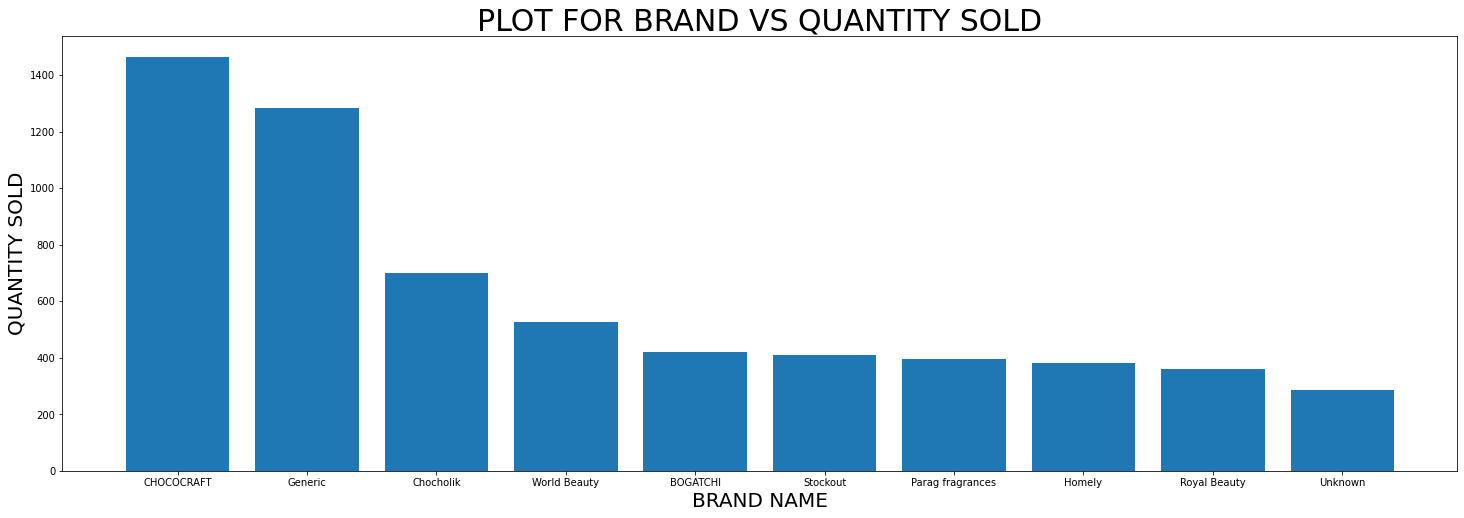

In [43]:
plt.figure(figsize = (25,8))
plt.title('PLOT FOR BRAND VS QUANTITY SOLD',fontsize=30)
plt.bar(list(brands[0:10].index),amzn['Brand'].value_counts()[0:10].tolist())
plt.xlabel("BRAND NAME",fontsize=20)
plt.ylabel("QUANTITY SOLD",fontsize=20)
plt.show()

**STOCK AVAILABILTY FOR DIFFERENT PRODUCTS**

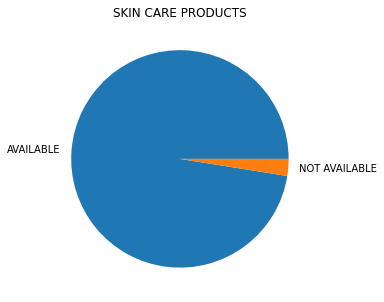

------------------------------------------------------------


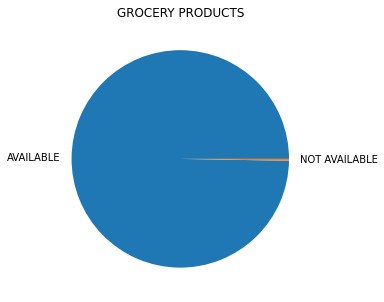

------------------------------------------------------------


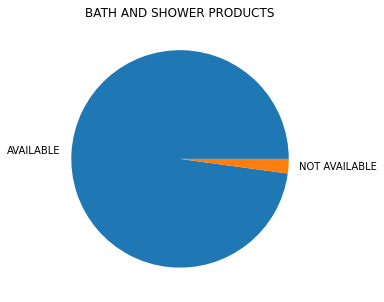

------------------------------------------------------------


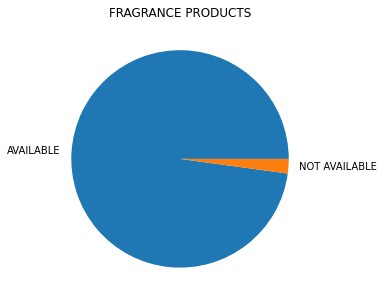

------------------------------------------------------------


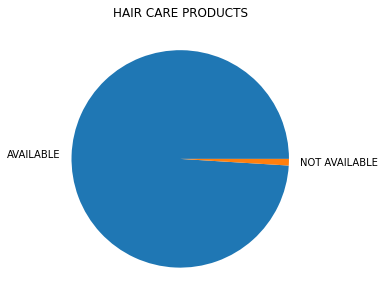

------------------------------------------------------------


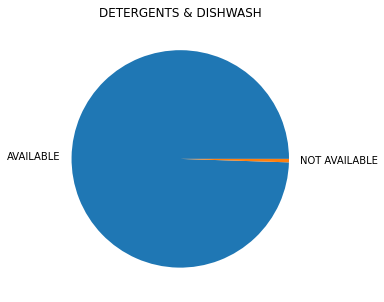

In [44]:
plt.figure(figsize = (12,5))
plt.title("SKIN CARE PRODUCTS")
plt.pie(skin_care['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()
print("------------------------------------------------------------")
plt.figure(figsize = (12,5))
plt.title("GROCERY PRODUCTS")
plt.pie(grocery['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()
print("------------------------------------------------------------")
plt.figure(figsize = (12,5))
plt.title("BATH AND SHOWER PRODUCTS")
plt.pie(bath['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()
print("------------------------------------------------------------")
plt.figure(figsize = (12,5))
plt.title("FRAGRANCE PRODUCTS")
plt.pie(bath['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()
print("------------------------------------------------------------")
plt.figure(figsize = (12,5))
plt.title("HAIR CARE PRODUCTS")
plt.pie(Hair['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()
print("------------------------------------------------------------")
plt.figure(figsize = (12,5))
plt.title("DETERGENTS & DISHWASH")
plt.pie(Dish['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()

In [45]:
# fig = px.histogram(amzn, x="Crawl Timestamp",title='Visualising the No. of products sold at a time interval',labels={'Crawl Timestamp':'Date and time of purchase'}, color_discrete_sequence=['green'] )
# fig.show()

In [46]:
import datetime
datetime.datetime.strptime('2019-10-30 11:38:11', "%Y-%m-%d %H:%M:%S")

datetime.datetime(2019, 10, 30, 11, 38, 11)

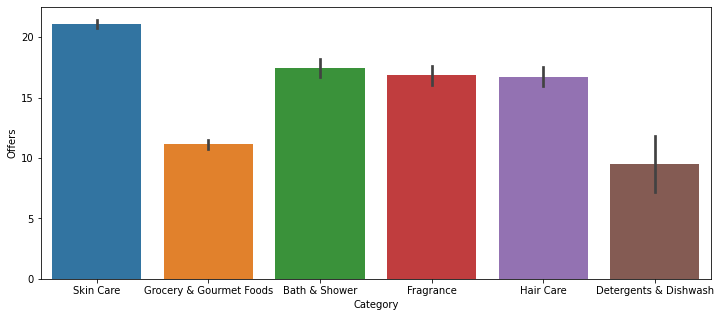

In [47]:
plt.figure(figsize = (12,5))
sns.barplot(x = amzn['Category'],y=amzn['Offers'])

[40, 36, 52, 69]


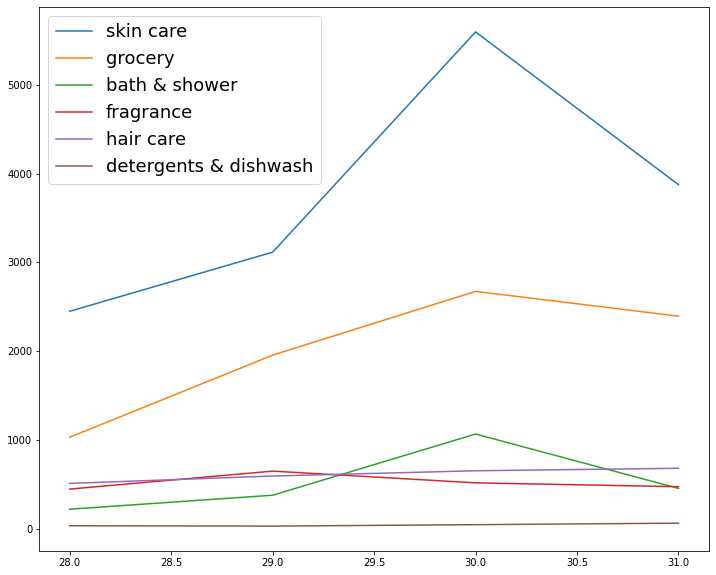

In [48]:
plt.figure(figsize = (12,10))

a = amzn[amzn['Category'] == 'Skin Care']
l = list(a.index)
months_skin_care = [a['Crawl Timestamp'][i].day for i in l]

days = list(set(months_skin_care))
product_sold_per_day_a =[months_skin_care.count(i) for i in days]



b = amzn[amzn['Category'] == 'Grocery & Gourmet Foods']
l = list(b.index)
months_grocery = [b['Crawl Timestamp'][i].day for i in l]

product_sold_per_day_b =[months_grocery.count(i) for i in days]



c = amzn[amzn['Category'] == 'Bath & Shower']
l = list(c.index)

months_grocery = [c['Crawl Timestamp'][i].day for i in l]

product_sold_per_day_c =[months_grocery.count(i) for i in days]


d = amzn[amzn['Category'] == 'Fragrance']
l = list(d.index)

months_grocery = [d['Crawl Timestamp'][i].day for i in l]

product_sold_per_day_d =[months_grocery.count(i) for i in days]


e = amzn[amzn['Category'] == 'Hair Care']
l = list(e.index)

months_grocery = [e['Crawl Timestamp'][i].day for i in l]

product_sold_per_day_e =[months_grocery.count(i) for i in days]



f = amzn[amzn['Category'] == 'Detergents & Dishwash']
l = list(f.index)
months_grocery = [f['Crawl Timestamp'][i].day for i in l]

product_sold_per_day_f =[months_grocery.count(i) for i in days]
print(product_sold_per_day_f)

plt.plot(days,product_sold_per_day_a,label="skin care")
plt.plot(days,product_sold_per_day_b,label="grocery")
plt.plot(days,product_sold_per_day_c,label="bath & shower")
plt.plot(days,product_sold_per_day_d,label ="fragrance")
plt.plot(days,product_sold_per_day_e,label ="hair care")
plt.plot(days,product_sold_per_day_f,label ="detergents & dishwash")
plt.legend(loc="upper left",fontsize=18)
plt.show()

Hence, from the above analysis we can conclude that skin care products are the highest grossing produts in the month with a large stock availibility and more offers.

### NORMALISATION

In [49]:
print("THE MEAN OF THE PRICE COLUMN IS: ",np.mean(amzn['Price'].tolist()))
print("THE VARIANCE OF THE PRICE COLUMN IS: ",np.var(amzn['Price'].tolist()))
print("THE STANDARD DEVIATION OF THE PRICE COLUMN IS: ",(np.std(amzn['Price'].tolist())))

THE MEAN OF THE PRICE COLUMN IS:  2006.4594916666667
THE VARIANCE OF THE PRICE COLUMN IS:  5271893.747172533
THE STANDARD DEVIATION OF THE PRICE COLUMN IS:  2296.060484214763


In [50]:
print("THE MEAN OF THE MRP COLUMN IS: ",np.mean(amzn['Mrp'].tolist()))
print("THE VARIANCE OF THE MRP COLUMN IS: ",np.var(amzn['Mrp'].tolist()))
print("THE STANDARD DEVIATION OF THE MRP COLUMN IS: ",np.sqrt(np.var(amzn['Mrp'].tolist())))

THE MEAN OF THE MRP COLUMN IS:  2499.5243506666666
THE VARIANCE OF THE MRP COLUMN IS:  9359821.070899704
THE STANDARD DEVIATION OF THE MRP COLUMN IS:  3059.382465612906


#### STANDARDIZATION
Standardization transforms data to have a mean of zero and a standard deviation of 1. 



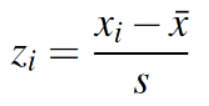

In [51]:
z_scores_price = []
mean_price = np.mean(amzn['Price'])
std_price = np.std(amzn['Price'])
for i in range(len(amzn['Uniq Id'])):
  z = (amzn['Price'][i] - mean_price)/std_price
  z_scores_price.append(z)

In [52]:
np.var(z_scores_price)

0.9999999999999908

In [53]:
print(round(np.mean(z_scores_price),2))

-0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



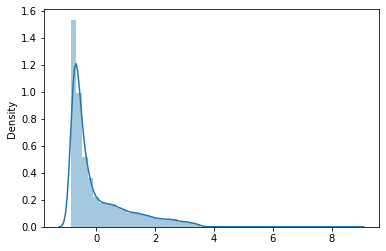

In [54]:
sns.distplot(z_scores_price,kde=True)

### HYPOTHESIS TESTING

In [55]:
'''
Hypothesis :
To check wether the offers increases with time

Average price on 28 : x
H0: mu0 <= x
H1: mu0 >  x
alpha = 0.05

Here mu0 represents the Average Price on 31

'''
_28 = []
_31 = []

for i in range(len(amzn['Uniq Id'])):
  if(amzn['Crawl Timestamp'][i].day == 28):
    _28.append(amzn['Offers'][i])
  if(amzn['Crawl Timestamp'][i].day == 31):
    _31.append(amzn['Offers'][i])

In [56]:
len(_31)

7964

In [57]:
from random import sample
from scipy.stats import norm

mean_28 = np.mean(_28)

smpl = []

for i in sample(range(len(_31)), 100):
    smpl.append(_31[i])
meanSample = np.mean(smpl)
stdSample =  np.std(smpl)

w = (meanSample - mean_28)/(stdSample / (100**0.5))
p = norm.cdf(w)

print(p, len(_31))

0.05195432802553822 7964


In [58]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

accept null hypothesis


From the value of p, we can see that it is greater than alpha (= 0.05),hence, we fail to reject the Null Hypothesis i. e.
we cannot say that the offers have increased from 28th to 31st.